<a href="https://colab.research.google.com/github/jagritishahi/Task-1/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Supervised ML**

### **Predict the percentage of an student based on the no. of study hours.**

### **Importing Libraries and Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1=pd.read_csv("http://bit.ly/w-data")
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


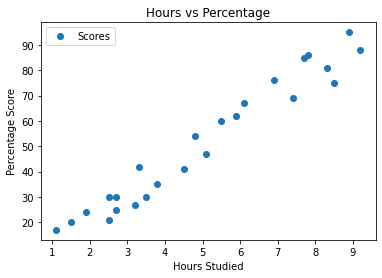

In [4]:
# Plotting the distribution of scores
df1.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [5]:
X=df1.iloc[:,:-1].values
Y=df1.iloc[:,1].values

### **Splitting the dataset**

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### **Training the Algorithm**

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Making Prediction**

In [9]:
y_pred=regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### **Comparing Actual and Predicted Values**

In [10]:
df2=pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
print("Training Score:",regressor.score(X_train,Y_train))
print("Testing Score: ",regressor.score(X_test,Y_test))

Training Score: 0.9515510725211553
Testing Score:  0.9454906892105354


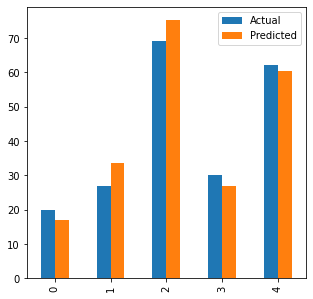

In [12]:
df2.plot(kind='bar',figsize=(5,5))
plt.show()

### **Visualization using Scatter Plot**

We make use of a scatter plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

<function matplotlib.pyplot.show>

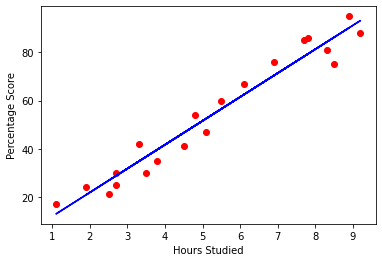

In [13]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show

We repeat the same task for our testing dataset:

<function matplotlib.pyplot.show>

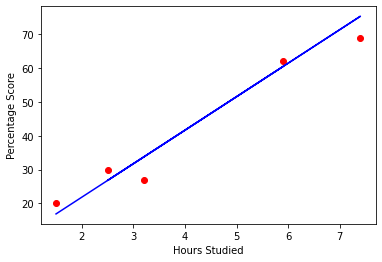

In [14]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show

### **Calculating score for 9.25 hours**

In [15]:
hours =np.array(9.25)
hours=hours.reshape(1,-1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


 So, the predicted score for 9.25 hours is 93.69173248737539.

### **Evaluating Model**

In [16]:
from sklearn import metrics  
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373
